**I. Xử lý dữ liệu từ file parquet về CSV**






In [ ]:
# Cài thư viện (chạy trong Colab / Jupyter)
!pip install -q pyarrow fastparquet

import os
import gc
import pandas as pd
from IPython.display import display
import pyarrow.parquet as pq

# Cấu hình
file_name = 'fhvhv_tripdata_2025-09.parquet'
file_path = f'/content/sample_data/{file_name}'
csv_output_path = f'/content/{os.path.splitext(os.path.basename(file_name))[0]}.csv'
BATCH_SIZE = 200_000

# Hàm kiểm tra Parquet
def has_parquet_header(path: str) -> bool:
    """
    Chỉ kiểm tra 4 byte đầu là 'PAR1' (nới lỏng điều kiện).
    Để pyarrow tự xử lý phần còn lại.
    """
    if not os.path.exists(path):
        return False
    if os.path.getsize(path) < 4:
        return False
    with open(path, 'rb') as f:
        header = f.read(4)
    return header == b'PAR1'


# Kiểm tra file đầu vào
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Không tìm thấy file Parquet: {file_path}")

if not has_parquet_header(file_path):
    raise ValueError(f"File không có header Parquet hợp lệ (PAR1): {file_path}")

# Xoá file CSV cũ nếu tồn tại (tránh ghi chồng dữ liệu)
if os.path.exists(csv_output_path):
    os.remove(csv_output_path)

# Đọc Parquet và ghi CSV
pf = pq.ParquetFile(file_path)
total_rows = pf.metadata.num_rows
num_row_groups = pf.metadata.num_row_groups

print(f"Sẵn sàng chuyển đổi: {file_name}")
print(f"- Row groups : {num_row_groups}")
print(f"- Tổng số dòng (từ metadata): {total_rows:,}")
print(f"- Batch size : {BATCH_SIZE:,} rows/batch")
print(f"- Đầu ra CSV : {csv_output_path}")

processed = 0
wrote_header = False
preview_shown = False

# Tăng giới hạn hiển thị để hiện đủ 100 dòng
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

try:
    for batch_idx, batch in enumerate(pf.iter_batches(batch_size=BATCH_SIZE)):
        # Mỗi batch là một RecordBatch của pyarrow -> chuyển sang pandas
        df = batch.to_pandas()

        # Hiển thị 100 dòng đầu tiên (chỉ 1 lần, từ batch đầu tiên)
        if not preview_shown:
            print("\n=== 100 dòng đầu tiên ===")
            display(df.head(100))
            preview_shown = True

        # Ghi CSV (chỉ ghi header lần đầu)
        df.to_csv(
            csv_output_path,
            mode='a',
            index=False,
            header=not wrote_header
        )
        wrote_header = True

        processed += len(df)
        if total_rows is not None and total_rows > 0:
            print(f"Đã ghi {processed:,}/{total_rows:,} dòng ({processed/total_rows:.2%})", end='\r')
        else:
            print(f"Đã ghi {processed:,} dòng", end='\r')

        # Dọn bộ nhớ giữa các batch
        del df, batch
        gc.collect()

    print(f"\nHoàn tất. Đã ghi toàn bộ dữ liệu ra: {csv_output_path}")

except Exception as e:
    raise RuntimeError(f"Đã xảy ra lỗi khi đọc/ghi: {e}")


Sẵn sàng chuyển đổi: fhvhv_tripdata_2025-09.parquet
- Row groups : 19
- Tổng số dòng (từ metadata): 19,434,641
- Batch size : 200,000 rows/batch
- Đầu ra CSV : /content/fhvhv_tripdata_2025-09.csv

=== 100 dòng đầu tiên ===


,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,cbd_congestion_fee
0,HV0003,B03404,B03404,2025-09-01 00:01:53,2025-09-01 00:03:08,2025-09-01 00:04:27,2025-09-01 00:10:17,107,79,1.070,351,35.71,0.00,0.85,3.16,2.75,0.0,4.24,19.74,N,N,N,N,N,1.5
1,HV0003,B03404,B03404,2025-09-01 00:11:14,2025-09-01 00:13:12,2025-09-01 00:13:26,2025-09-01 00:27:06,79,50,3.320,820,21.22,0.00,0.51,1.93,2.75,0.0,0.00,21.85,N,N,N,N,N,1.5
2,HV0003,B03404,B03404,2025-09-01 00:31:18,2025-09-01 00:33:00,2025-09-01 00:34:59,2025-09-01 00:50:19,68,231,2.730,920,25.28,0.00,0.59,2.24,2.75,0.0,0.00,16.09,N,N,N,N,N,1.5
3,HV0005,B03406,None,2025-09-01 00:13:37,2025-09-01 00:26:13,2025-09-01 00:26:18,2025-09-01 00:33:29,124,76,2.597,431,9.59,0.00,0.24,0.85,0.00,0.0,2.00,7.98,N,N,N,N,N,0.0
4,HV0003,B03404,B03404,2025-09-01 00:11:35,2025-09-01 00:19:45,2025-09-01 00:19:49,2025-09-01 00:28:00,260,7,1.300,490,11.62,0.00,0.29,1.02,0.00,0.0,0.00,8.24,N,N,N,N,N,0.0
5,HV0005,B03406,None,2025-08-31 23:56:36,2025-09-01 00:05:09,2025-09-01 00:05:20,2025-09-01 00:20:50,128,168,6.527,930,17.80,0.00,0.44,1.58,0.00,0.0,0.00,18.36,N,N,N,N,N,0.0
6,HV0005,B03406,None,2025-09-01 00:18:34,2025-09-01 00:26:18,2025-09-01 00:27:18,2025-09-01 00:53:21,168,265,11.714,1563,36.41,0.00,0.76,2.70,0.00,0.0,0.00,32.36,N,N,N,N,N,0.0
7,HV0003,B03404,B03404,2025-09-01 00:12:53,2025-09-01 00:16:12,2025-09-01 00:16:33,2025-09-01 00:23:41,28,215,1.360,428,10.71,0.00,0.27,0.95,0.00,0.0,3.00,18.39,N,N,N,N,N,0.0
8,HV0005,B03406,None,2025-09-01 00:31:40,2025-09-01 00:34:54,2025-09-01 00:34:55,2025-09-01 00:46:00,130,19,4.255,665,18.04,0.00,0.67,2.37,0.00,0.0,0.00,14.11,N,N,N,N,N,0.0
9,HV0005,B03406,None,2025-09-01 00:03:34,2025-09-01 00:06:47,2025-09-01 00:07:09,2025-09-01 00:20:53,69,74,2.900,824,17.32,0.00,0.36,1.29,0.00,0.0,0.00,12.67,N,N,N,N,N,0.0


**II. Thực hiện cài đặt demo**

**2.1 Import dữ liệu và khai báo các tham số**

In [47]:
import os, pickle, math, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Đường dẫn CSV sinh ra từ cell Parquet -> CSV
CSV_PATH = '/content/sample_data/fhvhv_tripdata_2025-09_sample.csv'

# Để demo nhanh, chỉ lấy tối đa N_ROWS đầu tiên
N_ROWS = 1_000_000

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Các siêu tham số cho thuật toán Heuristic
BATCH_SIZE = 4096 #kích thước mini-batch (mỗi lần update dùng 4096 chuyến)
LR = 0.005 #learning rate – “bước nhảy” khi cập nhật trọng số.
BETA_RMS = 0.9
EPS = 1e-8
MOMENTUM = 0.9
MAX_EPOCHS = 60
PATIENCE = 8
TOP_K_LOCS = 50

MIN_DURATION_SEC = 30 #Lọc ngưỡng 30 giây => chuyến xe lỗi
MAX_DURATION_SEC = 6 * 3600  #Lọc ngưỡng 6 giờ => dữ liệu không phù hợp

**2.2 Tiền xử lý dữ liệu**

In [48]:
#1. Xác định cột dữ liệu thời gian
def time_cols(df):
    pickup_col = 'pickup_datetime'
    dropoff_col = 'dropoff_datetime'
    return pickup_col, dropoff_col

#2. Tính thời lượng chuyến đi
def compute_duration_and_temporal_feats(df):
    df = df.copy()
    # lấy tên cột thời gian
    pickup_col, dropoff_col = time_cols(df)
    df[pickup_col]  = pd.to_datetime(df[pickup_col],  errors='coerce') #chuyển dữ liệu sang kiểu datetime
    df[dropoff_col] = pd.to_datetime(df[dropoff_col], errors='coerce') #chuyển dữ liệu sang kiểu datetime

    df['trip_seconds'] = (df[dropoff_col] - df[pickup_col]).dt.total_seconds() #tính thời lượng

    df = df[df['trip_seconds'].notnull()] #lọc dữ liệu lỗi, bất thường
    df = df[(df['trip_seconds'] >= MIN_DURATION_SEC) & (df['trip_seconds'] <= MAX_DURATION_SEC)]

    df['hour'] = df[pickup_col].dt.hour.astype('Int64').fillna(0).astype(int) #Tạo feature giờ trong ngày
    df['dow']  = df[pickup_col].dt.dayofweek.astype('Int64').fillna(0).astype(int) #Tạo feature ngày trong tuần
    return df


**2.3 Xác định biến mục tiêu (Số tiền khách phải trả):**

In [49]:
def build_fare_target(df, exclude_tips=True):
    # Map tên cột lowercase -> tên cột gốc
    cols_lower = {c.lower(): c for c in df.columns}

    def has(c):
        return c in cols_lower

    # Danh sách các cột phí sẽ cộng lại
    parts_candidates = [
        'base_passenger_fare',   # giá cơ bản
        'tolls',                 # phí cầu đường
        'bcf',                   # black car fund
        'sales_tax',             # thuế
        'congestion_surcharge',  # phụ phí tắc đường
        'airport_fee',
        'cbd_congestion_fee'
    ]

    parts = []
    for p in parts_candidates:
        if has(p):
            col = pd.to_numeric(df[cols_lower[p]], errors='coerce').fillna(0.0)
            parts.append(col)

    if not parts:
        raise ValueError(
            "Không tìm thấy các cột thành phần phí để tạo nhãn."
        )

    # Tổng tiền khách phải trả (chưa tính tips)
    y_sum = np.sum(parts, axis=0)

    # Tuỳ chọn: cộng thêm tips vào tổng nếu exclude_tips=False
    if (not exclude_tips) and has('tips'):
        tips = pd.to_numeric(df[cols_lower['tips']], errors='coerce').fillna(0.0)
        y_sum = y_sum + tips

    df['target_fare'] = y_sum

    # Bỏ các bản ghi nhãn lỗi / không hợp lý
    df = df[df['target_fare'].notnull() & (df['target_fare'] > 0)]

    # Lọc outlier theo quantile 1%–99%
    q_low, q_high = df['target_fare'].quantile([0.01, 0.99])
    df = df[(df['target_fare'] >= q_low) & (df['target_fare'] <= q_high)]

    return df


**2.4 Chia train theo thời gian: t, t+1 (Temporal learning)**

In [50]:
def temporal_split_indices(df, pickup_col, train_ratio=0.70, val_ratio=0.15):
    n = len(df)
    order = df[pickup_col].sort_values(kind='mergesort').index.to_numpy() #sort thời gian cũ -> mới
    t_end_train = int(train_ratio * n)
    t_end_val   = int((train_ratio + val_ratio) * n)
    train_idx = order[:t_end_train]
    val_idx   = order[t_end_train:t_end_val]
    test_idx  = order[t_end_val:]
    return train_idx, val_idx, test_idx

**2.5 Chuẩn hóa tập training và áp dụng cho các phần còn lại**

In [51]:
def fit_preprocessors(df_train):
    """
    - Chọn cột numeric / categorical
    - Tính mean, std cho numeric
    - Lấy top-K giá trị phổ biến cho từng cat col
    """
    cols = df_train.columns

    # Chọn ra biến độc lập dạng số
    num_cands = [
        'trip_miles',
        'trip_time',
        'trip_seconds',
        'hour',
        'dow',
        'base_passenger_fare',
    ]
    num_cols = [c for c in num_cands if c in cols]

    if num_cols:
        Xnum_df = (
            df_train[num_cols]
            .apply(pd.to_numeric, errors='coerce')
            .fillna(0.0)
        )
        # mu, sigma là Series, index theo tên cột → sau này align theo tên rất an toàn
        mu = Xnum_df.mean()
        sigma = Xnum_df.std().replace(0, 1.0)  # tránh std = 0
    else:
        mu = None
        sigma = None

    # Biến độc lập khác dạng số
    cat_cands = ['PULocationID', 'DOLocationID', 'hvfhs_license_num']
    cat_cols = [c for c in cat_cands if c in cols]

    # top-K giá trị phổ biến cho từng cột (đối với những gia trị ít xuất hiện xem như 1 mục để tracsnh sai lệch)
    topk_maps = {}
    for c in cat_cols:
        top_vals = (
            df_train[c]
            .value_counts(dropna=False)
            .nlargest(TOP_K_LOCS)
            .index
            .tolist()
        )
        topk_maps[c] = top_vals

    return {
        'num_cols': num_cols,
        'cat_cols': cat_cols,
        'topk_maps': topk_maps,
        'mu': mu,
        'sigma': sigma,
    }


def transform_with_fit(df, fitobj):
    """
    Biến df -> ma trận X (numpy) dựa trên fitobj:
      - Numeric: (x - mu) / sigma
      - Cat: one-hot cho top-K + OTHER (vector hóa bằng get_dummies)
    """
    df = df.copy()
    num_cols  = fitobj['num_cols']
    cat_cols  = fitobj['cat_cols']
    topk_maps = fitobj['topk_maps']
    mu        = fitobj['mu']
    sigma     = fitobj['sigma']

    # Dạng số
    X_num = np.zeros((len(df), 0))
    num_feature_names = []

    if num_cols:
        Xnum_df = (
            df[num_cols]
            .apply(pd.to_numeric, errors='coerce')
            .fillna(0.0)
        )
        if (mu is not None) and (sigma is not None):
            # mu, sigma là Series index theo tên cột → broadcast theo cột
            Xnum_df = (Xnum_df - mu) / sigma
        X_num = Xnum_df.to_numpy(dtype=float)
        num_feature_names = list(num_cols)

    # Phân loại (one-hot top-K + OTHER)
    X_cat = np.zeros((len(df), 0))
    cat_feature_names = []

    for c in cat_cols:
        top_vals = topk_maps.get(c, [])
        n = len(df)

        # Chuẩn hóa giá trị: mọi thứ ngoài top-K gộp thành 'OTHER'
        vals = df[c].astype('object')
        vals = vals.where(vals.isin(top_vals), 'OTHER')

        # One-hot bằng pandas (nhanh hơn vòng for từng dòng)
        # Cột dummy ban đầu dùng chính giá trị
        dummies = pd.get_dummies(vals)

        # Đảm bảo đủ cột cho tất cả top_vals + OTHER và đúng thứ tự
        dummy_cols = list(top_vals) + ['OTHER']
        dummies = dummies.reindex(columns=dummy_cols, fill_value=0.0)

        # Đổi tên cột theo format c=val cho thống nhất với bản cũ
        rename_map = {v: f"{c}={v}" for v in dummy_cols}
        dummies.rename(columns=rename_map, inplace=True)

        M = dummies.to_numpy(dtype=float)

        if X_cat.shape[1] == 0:
            X_cat = M
        else:
            X_cat = np.hstack([X_cat, M])

        cat_feature_names.extend(list(dummies.columns))

    # Ghép numeric + categorical
    if X_num.shape[1] and X_cat.shape[1]:
        X = np.hstack([X_num, X_cat])
    elif X_cat.shape[1]:
        X = X_cat
    else:
        X = X_num

    feature_names = num_feature_names + cat_feature_names
    return X, feature_names


**2.6 Chia dữ liệu thành các batch theo thời gian (mini-batch)**

In [52]:
#Xa: ma trận feature (X_train) đã được sắp xếp theo thời gian từ trước.
#ya: vector nhãn tương ứng (y_train).
#batch_size: kích thước mỗi mini-batch (mặc định dùng BATCH_SIZE = 4096) được khai báo ở mục 2.1
#thực hiện vòng lặp
def gen_batches_temporal(Xa, ya, batch_size=BATCH_SIZE):
    n = Xa.shape[0]
    for i in range(0, n, batch_size):
        j = min(i + batch_size, n)
        yield Xa[i:j], ya[i:j]

**2.7 Baseline: Gradient Descent thuận với dataset chia theo batch**

In [53]:
def train_plain_gd_temporal(
    X_train, y_train, X_val, y_val,
    lr=0.001,          # lr cố định, không adaptive
    max_epochs=60,
    patience=8,        # vẫn cho early stopping
    clip_norm=None,    # mặc định không clipping
    verbose=False
):
    """
    Baseline: Gradient Descent thuần, không RMSProp, không Momentum.
    Vẫn đi mini-batch theo thời gian
    """
    n_features = X_train.shape[1]
    w = np.zeros(n_features)

    best_val = float('inf')
    best_w = w.copy()
    stall = 0

    hist_train, hist_val = [], []

    for epoch in range(1, max_epochs + 1):
        total_loss, total_n = 0.0, 0

        # vẫn dùng gen_batches_temporal
        for Xb, yb in gen_batches_temporal(X_train, y_train, batch_size=BATCH_SIZE):
            pred = Xb @ w
            err = pred - yb
            grad = (Xb.T @ err) / max(len(yb), 1)

            # baseline: mặc định không clipping
            if clip_norm is not None:
                gnorm = np.linalg.norm(grad)
                if gnorm > clip_norm:
                    grad *= (clip_norm / (gnorm + 1e-12))

            w = w - lr * grad

            total_loss += float(np.mean(err ** 2)) * len(yb)
            total_n += len(yb)

        train_mse = total_loss / max(total_n, 1)
        val_mse = float(np.mean((X_val @ w - y_val) ** 2))

        hist_train.append(train_mse)
        hist_val.append(val_mse)

        if verbose:
            print(f"[PlainGD] Epoch {epoch:02d}: "
                  f"train_mse={train_mse:.4f} | val_mse={val_mse:.4f}")

        # early stopping
        if val_mse + 1e-9 < best_val:
            best_val = val_mse
            best_w = w.copy()
            stall = 0
        else:
            stall += 1
            if stall >= patience:
                if verbose:
                    print("[PlainGD] Early stopping (val không cải thiện).")
                break

    return best_w, {'train_mse': hist_train, 'val_mse': hist_val}


**2.7 Áp dụng Heuristic trong training: mini-batch, adaptive learning rate, momentum, clipping, early stopping**

In [54]:
# 1. MINI-TEMPOREL: MÁY CHẠY CHƯƠNG TRÌNH THỜI GIAN

def run_mini_temporel(init_state, step_fn, T, keep_history=None):
    """
    Máy chạy "TempoDL" đơn giản:
      - state(t+1) = step_fn(t, state(t))
      - chỉ giữ state cuối, nhưng có thể lưu history cho vài biến quan trọng.

    init_state: dict, ví dụ {'w': w0, ...}
    step_fn: (t, state) -> new_state
    T: số bước lặp tối đa (epoch)
    keep_history: list tên biến cần log theo thời gian (vd ['train_mse', 'val_mse'])
    """
    state = {k: v for k, v in init_state.items()}
    keep_history = keep_history or []

    history = {k: [] for k in keep_history}

    for t in range(T):
        # lưu history TRƯỚC khi update
        for k in keep_history:
            history[k].append(state.get(k))

        # cập nhật trạng thái theo quy tắc
        state = step_fn(t, state)

        # Hỗ trợ early stopping: nếu state['done'] == True thì dừng
        if state.get('done'):
            break

    return state, history

# 2. BGD + RMSPROP + MOMENTUM

def make_training_step_fn(
    X_train, y_train, X_val, y_val,
    lr=LR, beta_rms=BETA_RMS, momentum=MOMENTUM,
    batch_size=BATCH_SIZE, clip_norm=10.0, patience=PATIENCE
):
    """
    Sinh ra step_fn mô tả:
      - w(t+1), v(t+1), m(t+1)
      - train_mse(t+1), val_mse(t+1)
      - best_w, best_val, stall, done (cho early stopping)

      """
    def step_fn(t, state):
        w = state['w']
        v = state['v']
        m = state['m']
        best_w = state['best_w']
        best_val = state['best_val']
        stall = state['stall']

        total_loss, total_n = 0.0, 0

        # Một epoch = duyệt toàn bộ train theo mini-batch thời gian
        for Xb, yb in gen_batches_temporal(X_train, y_train, batch_size):
            pred = Xb @ w
            err = pred - yb
            grad = (Xb.T @ err) / max(len(yb), 1)

            # Gradient clipping
            gnorm = np.linalg.norm(grad)
            if gnorm > clip_norm:
                grad *= (clip_norm / (gnorm + 1e-12))

            # RMSProp + Momentum
            v = beta_rms * v + (1 - beta_rms) * (grad ** 2)
            m = momentum * m + (lr * grad) / (np.sqrt(v) + EPS)
            w = w - m

            total_loss += float(np.mean(err ** 2)) * len(yb)
            total_n += len(yb)

        train_mse = total_loss / max(total_n, 1)
        val_mse = float(np.mean((X_val @ w - y_val) ** 2))

        # Early stopping theo val_mse
        if val_mse + 1e-9 < best_val:
            best_val = val_mse
            best_w = w.copy()
            stall = 0
        else:
            stall += 1

        done = stall >= patience

        # Trạng thái mới (chỉ 1 version, không lưu lịch sử cũ)
        new_state = {
            'w': w,
            'v': v,
            'm': m,
            'best_w': best_w,
            'best_val': best_val,
            'stall': stall,
            'train_mse': train_mse,
            'val_mse': val_mse,
            'done': done
        }
        return new_state

    return step_fn

import time

def train_naive_rmsprop_momentum_temporal(
    X_train, y_train, X_val, y_val,
    lr=LR, beta_rms=BETA_RMS, momentum=MOMENTUM,
    max_epochs=MAX_EPOCHS, patience=PATIENCE,
    clip_norm=10.0, verbose=False
):
    """
      - Vòng lặp epoch viết tay
      - Dùng cùng thuật toán RMSProp+Momentum, cùng batch theo thời gian
      - Trả về best_w và lịch sử MSE để so sánh
    """
    n_features = X_train.shape[1]
    w = np.zeros(n_features)
    v = np.zeros_like(w)
    m = np.zeros_like(w)

    best_val = float('inf')
    best_w = w.copy()
    stall = 0

    hist_train, hist_val = [], []

    for epoch in range(1, max_epochs + 1):
        t0 = time.perf_counter()

        total_loss, total_n = 0.0, 0

        for Xb, yb in gen_batches_temporal(X_train, y_train, batch_size=BATCH_SIZE):
            pred = Xb @ w
            err = pred - yb
            grad = (Xb.T @ err) / max(len(yb), 1)

            gnorm = np.linalg.norm(grad)
            if gnorm > clip_norm:
                grad *= (clip_norm / (gnorm + 1e-12))

            v = beta_rms * v + (1 - beta_rms) * (grad ** 2)
            m = momentum * m + (lr * grad) / (np.sqrt(v) + EPS)
            w = w - m

            total_loss += float(np.mean(err ** 2)) * len(yb)
            total_n += len(yb)

        train_mse = total_loss / max(total_n, 1)
        val_mse = float(np.mean((X_val @ w - y_val) ** 2))

        hist_train.append(train_mse)
        hist_val.append(val_mse)

        t1 = time.perf_counter()

        if verbose:
            print(f"[Naive] Epoch {epoch:02d}: "
                  f"train_mse={train_mse:.4f} | val_mse={val_mse:.4f} | "
                  f"time={t1 - t0:.3f}s")

        if val_mse + 1e-9 < best_val:
            best_val = val_mse
            best_w = w.copy()
            stall = 0
        else:
            stall += 1
            if stall >= patience:
                if verbose:
                    print("[Naive] Early stopping (val không cải thiện).")
                break

    return best_w, {'train_mse': hist_train, 'val_mse': hist_val}


**2.8 Đánh giá mô hình**

In [55]:
def evaluate_on_test(w, X_test, y_test_raw, y_mean, y_std):
    """
    Dùng cùng cách chuẩn hoá như pipeline hiện tại để đánh giá trên scale tiền thật.
    """
    y_pred_std = X_test @ w
    y_pred = y_pred_std * y_std + y_mean

    mse = mean_squared_error(y_test_raw, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test_raw, y_pred)
    r2 = r2_score(y_test_raw, y_pred)

    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2, 'y_pred': y_pred}

**2.8 Chạy pipeline**

Reading CSV sample...
CSV loaded, rows = 5000
pickup_col: pickup_datetime | dropoff_col: dropoff_datetime
Rows after duration & target_fare filters: 4900
Shapes: X_train (3430, 111) X_val (735, 111) X_test (735, 111)
MINI-TEMPOREL (RMSProp+Mom+clip)
Time: 0.007s
MSE=52.5690 | RMSE=7.2504 | MAE=4.9651 | R2=0.8300
NAIVE RMSProp+Momentum
Time: 0.006s
MSE=52.5690 | RMSE=7.2504 | MAE=4.9651 | R2=0.8300
PLAIN GRADIENT DESCENT (NO HEURISTICS)
Time: 0.019s
MSE=231.3443 | RMSE=15.2100 | MAE=12.2625 | R2=0.2521
So sánh kết quả
max|w_mini_temporel - w_naiveRMSProp| = 0.000000e+00
max|w_mini_temporel - w_plainGD|      = 2.551250e-01
Time (mini-Temporel) = 0.007s | NaiveRMSProp = 0.006s | PlainGD = 0.019s


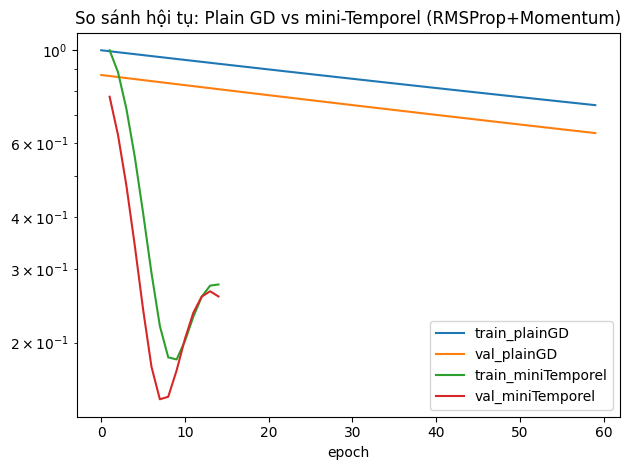

In [56]:
# 1 Đọc dữ liệu
if not os.path.exists(CSV_PATH):
    raise FileNotFoundError("Không tìm thấy file CSV: " + CSV_PATH)

print("Reading CSV sample...")
df0 = pd.read_csv(CSV_PATH, low_memory=False, nrows=N_ROWS)
print("CSV loaded, rows =", len(df0))

pickup_col, dropoff_col = time_cols(df0)
print("pickup_col:", pickup_col, "| dropoff_col:", dropoff_col)

# 2 Xử lý thời gian & duration
df = compute_duration_and_temporal_feats(df0)

# 3 Xây nhãn target_fare
df = build_fare_target(df, exclude_tips=True)
print("Rows after duration & target_fare filters:", len(df))

# 4 Chia tập theo thời gian
train_idx, val_idx, test_idx = temporal_split_indices(df, pickup_col, train_ratio=0.70, val_ratio=0.15)
df_train = df.loc[train_idx]
df_val   = df.loc[val_idx]
df_test  = df.loc[test_idx]

# 5 Tiền xử lý feature
fitobj = fit_preprocessors(df_train)
X_train, feat_names = transform_with_fit(df_train, fitobj)
X_val, _ = transform_with_fit(df_val, fitobj)
X_test, _ = transform_with_fit(df_test, fitobj)

# 6 Chuẩn hoá target (z-score) cho train/val
y_train_raw = df_train['target_fare'].to_numpy().astype(float)
y_val_raw   = df_val['target_fare'].to_numpy().astype(float)
y_test_raw  = df_test['target_fare'].to_numpy().astype(float)

y_mean = y_train_raw.mean()
y_std  = y_train_raw.std() + 1e-8

y_train = (y_train_raw - y_mean) / y_std
y_val   = (y_val_raw   - y_mean) / y_std
y_test  = y_test_raw  # giữ nguyên scale tiền thật cho đánh giá

print("Shapes:", "X_train", X_train.shape, "X_val", X_val.shape, "X_test", X_test.shape)

# 7 Training bằng Temporel (RMSProp + Momentum + clipping)
n_features = X_train.shape[1]
init_state = {
    'w': np.zeros(n_features),
    'v': np.zeros(n_features),
    'm': np.zeros(n_features),
    'best_w': np.zeros(n_features),
    'best_val': float('inf'),
    'stall': 0,
    'train_mse': None,
    'val_mse': None,
    'done': False
}

step_fn = make_training_step_fn(
    X_train, y_train, X_val, y_val,
    lr=LR, beta_rms=BETA_RMS, momentum=MOMENTUM,
    batch_size=BATCH_SIZE, clip_norm=10.0, patience=PATIENCE
)

t0 = time.perf_counter()
final_state, history_mt = run_mini_temporel(
    init_state=init_state,
    step_fn=step_fn,
    T=MAX_EPOCHS,
    keep_history=['train_mse', 'val_mse']
)
t1 = time.perf_counter()

w_mt = final_state['best_w']
metrics_mt = evaluate_on_test(w_mt, X_test, y_test_raw, y_mean, y_std)


# 8 Trainning 1: RMSProp + Momentum nhưng viết "naive" (không mini-Temporel)
t2 = time.perf_counter()
w_nv, history_nv = train_naive_rmsprop_momentum_temporal(
    X_train, y_train, X_val, y_val,
    lr=LR, beta_rms=BETA_RMS, momentum=MOMENTUM,
    max_epochs=MAX_EPOCHS, patience=PATIENCE,
    clip_norm=10.0, verbose=False
)
t3 = time.perf_counter()

metrics_nv = evaluate_on_test(w_nv, X_test, y_test_raw, y_mean, y_std)


# 9 Training 2: Plain Gradient Descent (KHÔNG heuristic RMSProp/Momentum)
t4 = time.perf_counter()
w_gd, history_gd = train_plain_gd_temporal(
    X_train, y_train, X_val, y_val,
    lr=0.001,
    max_epochs=MAX_EPOCHS,
    patience=PATIENCE,
    clip_norm=None,
    verbose=False
)
t5 = time.perf_counter()

metrics_gd = evaluate_on_test(w_gd, X_test, y_test_raw, y_mean, y_std)


# 10 In kq so sánh
print("MINI-TEMPOREL (RMSProp+Mom+clip)")
print(f"Time: {t1 - t0:.3f}s")
print(f"MSE={metrics_mt['mse']:.4f} | RMSE={metrics_mt['rmse']:.4f} | "
      f"MAE={metrics_mt['mae']:.4f} | R2={metrics_mt['r2']:.4f}")

print("NAIVE RMSProp+Momentum")
print(f"Time: {t3 - t2:.3f}s")
print(f"MSE={metrics_nv['mse']:.4f} | RMSE={metrics_nv['rmse']:.4f} | "
      f"MAE={metrics_nv['mae']:.4f} | R2={metrics_nv['r2']:.4f}")

print("PLAIN GRADIENT DESCENT (NO HEURISTICS)")
print(f"Time: {t5 - t4:.3f}s")
print(f"MSE={metrics_gd['mse']:.4f} | RMSE={metrics_gd['rmse']:.4f} | "
      f"MAE={metrics_gd['mae']:.4f} | R2={metrics_gd['r2']:.4f}")

# So sánh vector w
w_diff_mt_nv = np.max(np.abs(w_mt - w_nv))
w_diff_mt_gd = np.max(np.abs(w_mt - w_gd))

print("So sánh kết quả")
print(f"max|w_mini_temporel - w_naiveRMSProp| = {w_diff_mt_nv:.6e}")
print(f"max|w_mini_temporel - w_plainGD|      = {w_diff_mt_gd:.6e}")
print(f"Time (mini-Temporel) = {t1 - t0:.3f}s | "
      f"NaiveRMSProp = {t3 - t2:.3f}s | PlainGD = {t5 - t4:.3f}s")

# 11 VẼ learning curve so sánh hội tụ
plt.figure()
plt.plot(history_gd['train_mse'], label='train_plainGD')
plt.plot(history_gd['val_mse'],   label='val_plainGD')
plt.plot(history_mt['train_mse'], label='train_miniTemporel')
plt.plot(history_mt['val_mse'],   label='val_miniTemporel')
plt.yscale('log')
plt.legend()
plt.title("So sánh hội tụ: Plain GD vs mini-Temporel (RMSProp+Momentum)")
plt.xlabel("epoch")
plt.tight_layout()
plt.show()


